# 6.3 Geographical Visualizations with Python

## Table of Contents

    1. Notebook Prep
    
    2. Data Wrangling
    
    3. Data Cleaning
    
    4. Create Chloropleth Map
    
    5. Result Discussion

### 1. Notebook Prep

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import seaborn as sns
import folium
import json

In [2]:
# Let matplotlib visuals appear

%matplotlib inline

In [3]:
# Import combined births and finances data set

bf = pd.read_csv(r'D:\Achievement 6\02 Data\Prepared Data\births_finances_combined.csv', index_col = False)

In [4]:
# Import JSON

geo = r'C:\Users\PC Planet\Desktop\Self-Education\Data Immersion\Achievement 6\us-states.json'

### 2. Data Wrangling

In [5]:
# Subset, Aggregate, and Average 'total_expenditure_per_student' for all years

bf_agg = bf.groupby(['state'])['total_expenditure_per_student'].mean()

bf_agg.head()

state
Alabama        8.526078
Alaska        13.292302
Arizona        7.819449
Arkansas       8.810315
California     9.443389
Name: total_expenditure_per_student, dtype: float64

In [6]:
# Convert groupby object to dataframe

bf_agg = bf_agg.reset_index()

bf_agg.head(10)

,state,total_expenditure_per_student
0,Alabama,8.526078
1,Alaska,13.292302
2,Arizona,7.819449
3,Arkansas,8.810315
4,California,9.443389
5,Colorado,9.087151
6,Connecticut,12.820869
7,Delaware,12.595682
8,District of Columbia,16.334887
9,Florida,8.836700


### 3. Data Cleaning

In [7]:
# Remove District of Columbia from data frame, since it's not available in JSON

bf_agg = bf_agg.drop(8).reset_index(drop=True)

bf_agg.head(10)

,state,total_expenditure_per_student
0,Alabama,8.526078
1,Alaska,13.292302
2,Arizona,7.819449
3,Arkansas,8.810315
4,California,9.443389
5,Colorado,9.087151
6,Connecticut,12.820869
7,Delaware,12.595682
8,Florida,8.836700
9,Georgia,9.422597


<AxesSubplot:xlabel='total_expenditure_per_student', ylabel='Count'>

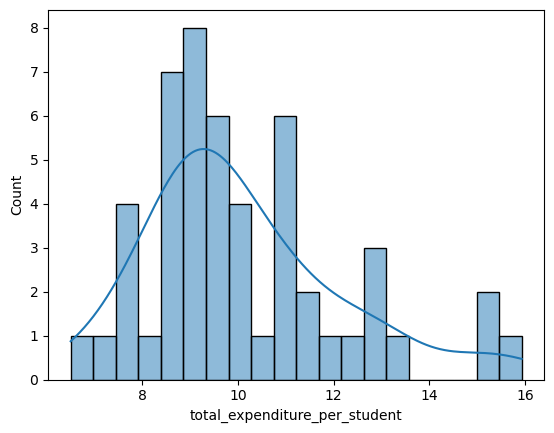

In [8]:
# Check for extreme values

sns.histplot(bf_agg['total_expenditure_per_student'], bins = 20, kde = True)

No extreme values

### 4. Create Choropleth Map

In [9]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = geo,
    data = bf_agg,
    columns = ['state','total_expenditure_per_student'],
    key_on = 'feature.properties.name',
    fill_color = 'BuPu', fill_opacity = 0.6, line_opacity = 0.1,
    legend_name = "Average Expenditure per Student").add_to(map)

folium.LayerControl().add_to(map)

map

### 5. Results Discussion

The choropleth shows that the states with the highest investment in public education are New York, New Jersey, and Vermont, followed by Alaska, Wyoming, and Connecticut.

In [13]:
bf.columns

Index(['Unnamed: 0', 'state', 'year', 'education_level', 'education_code',
       'number_of_births', 'avg_mother_age', 'avg_birth_weight_grams',
       'ref_year', 'enrolled', 'total_revenue', 'federal_revenue',
       'state_revenue', 'local_revenue', 'total_expenditure',
       'instruction_expenditure', 'support_services_expenditure',
       'other_expenditure', 'capital_outlay_expenditure',
       'total_expenditure_per_student', 'instruction_expenditure_per_student',
       'support_expenditure_per_student', '7yr_avg_total_per_student',
       '7yr_avg_instruction_per_student', '7yr_avg_support_per_student'],
      dtype='object')

In [26]:
bf_state_num = bf.groupby(['state', 'education_code'])['number_of_births'].mean()

bf_state_num.head(450)

state      education_code
Alabama    -9                  103.166667
            1                 2186.000000
            2                 6099.500000
            3                18632.500000
            4                12300.833333
                                 ...     
Wisconsin   4                11181.833333
            5                 6970.333333
            6                15785.666667
            7                 5407.833333
            8                 1746.833333
Name: number_of_births, Length: 450, dtype: float64

In [27]:
map2 = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = geo,
    data = bf,
    columns = ['state','avg_mother_age'],
    key_on = 'feature.properties.name',
    fill_color = 'BuPu', fill_opacity = 0.6, line_opacity = 0.1,
    legend_name = "Average Mother Age").add_to(map2)

folium.LayerControl().add_to(map2)

map2

In [28]:
map3 = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = geo,
    data = bf,
    columns = ['state','avg_birth_weight_grams'],
    key_on = 'feature.properties.name',
    fill_color = 'BuPu', fill_opacity = 0.6, line_opacity = 0.1,
    legend_name = "Average Birth Weight (grams)").add_to(map3)

folium.LayerControl().add_to(map3)

map3

The analysis does seem to indicate that dividing the data by states does not yield results consistent with the idea that early public funding affects the age a mother gives birth nor the child's birth weight.

Rather than leading me to any new research questions, it seems to put the nail in the coffin in any connection between educational funding and future motherhood.